# Lane Switch Agents

In [ ]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
import logging
import pandas as pd

from environment_gym import TrafficEnvironment
from task2_environment import CustomTrafficEnvironment
from task2_agents import RuleBasedAgent, TemporalDifference

## Rule-Based Agent

### Rule-based agents

In [ ]:
def evaluate_agent(agent, env, num_episodes=10):
    all_episode_rewards = []
    all_timesteps = []

    for episode in range(num_episodes):
        episode_rewards = []
        
        state, _ = env.reset()
        terminated = False
        cumulative_reward = 0
        timestep = 0
        # action_mapping = {0: 'left', 1: 'stay', 2: 'right', 3: 'rest'}

        while not terminated and timestep < env.max_time_steps:
            action = agent.choose_action(state)
            # env.logger.info(f"Action: {action_mapping[action]}")
            next_state, reward, terminated, truncated, _ = env.step(action)
            cumulative_reward += reward
            state = next_state
            timestep += 1
            
            # Store rewards at each timestep for this episode
            episode_rewards.append(cumulative_reward)

            if truncated:
                # print('Episode terminated due to reaching maximum timesteps.')
                break

        # Append results for each episode
        all_episode_rewards.append(episode_rewards)
        all_timesteps.append(timestep)

    return all_episode_rewards, all_timesteps

def plot_training_metrics(all_episode_rewards, all_timesteps, window_size=10):
    """
    Plot cumulative rewards and timesteps to termination with a rolling mean.

    Args:
    - all_episode_rewards (list of lists): Cumulative rewards for each episode.
    - all_timesteps (list): Number of timesteps to termination for each episode.
    - window_size (int): Window size for rolling mean.
    """
    # Compute rolling mean for cumulative rewards across episodes
    rolling_rewards = pd.DataFrame(all_episode_rewards).mean(axis=0).rolling(window_size).mean()
    # Compute rolling mean for timesteps to termination
    rolling_timesteps = pd.Series(all_timesteps).rolling(window_size).mean()

    # Plot the cumulative rewards with rolling mean
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rolling_rewards, label='Cumulative Reward (Rolling Mean)')
    plt.xlabel('Timesteps')
    plt.ylabel('Cumulative Reward')
    plt.title(f'Cumulative Rewards Over Episodes (Rolling Mean - Window Size: {window_size})')
    plt.legend()

    # Plot the timesteps to termination with rolling mean
    plt.subplot(1, 2, 2)
    plt.plot(rolling_timesteps, label='Timesteps to Termination (Rolling Mean)')
    plt.xlabel('Episode')
    plt.ylabel('Timesteps')
    plt.title(f'Timesteps to Termination (Rolling Mean - Window Size: {window_size})')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_level=logging.INFO)

# Evaluate each strategy
strategies = ['random' , 'rule_based', 'rule_based_2']
rewards_dict = {}
timesteps_dict = {}

for strategy in strategies:
    env.logger.info(f"Evaluating {strategy} strategy")
    agent = RuleBasedAgent(strategy=strategy)
    # episode_rewards, checkpoint_rewards, timesteps_to_termination = evaluate_agent(agent, env)
    all_episode_rewards, all_timesteps = evaluate_agent(agent, env, num_episodes=10)
    rewards_dict[strategy] = all_episode_rewards
    timesteps_dict[strategy] = all_timesteps
    # env.logger.info("\n"*5)

Total timesteps to termination for random strategy: 586
Total timesteps to termination for rule_based strategy: 253
Total timesteps to termination for rule_based_2 strategy: 451


Total rewards for random strategy: -18267.999999999993
Total rewards for rule_based strategy: -4086.799999999996
Total rewards for rule_based_2 strategy: -10485.099999999997


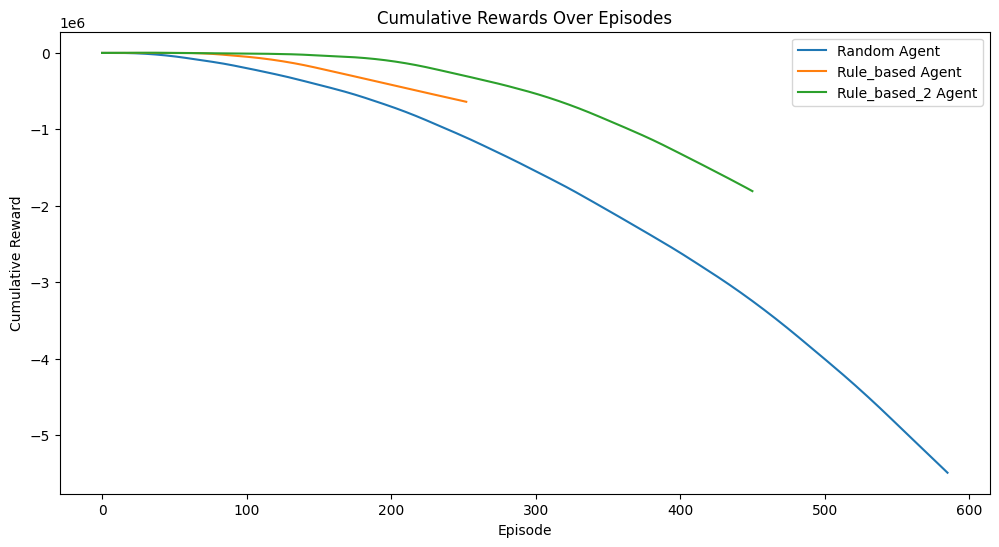

In [ ]:
# # Plot results
# plot_results(rewards_dict)
plot_training_metrics(all_episode_rewards, all_timesteps, window_size=10)

## Value-based Agent

### TD-Lambda

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_level=logging.INFO)

sarsa = TemporalDifference(env, oiv = 0, alpha=0.1, epsilon=0.1, lambd=0, gamma=0.9)
total_reward_list, total_steps_list = sarsa.train(num_episodes = 1000, on_policy = True, save_model = False)
total_rew = sum(total_reward_list)
avg_rew = np.mean(total_reward_list)
avg_steps = np.mean(total_steps_list)

print(f'Sum of total rewards = {total_rew}')
print(f'Average total reward per episode = {avg_rew}')
print(f'Average steps per episode = {avg_steps}')

# plot training metrics
sarsa.plot_training_metrics(window_size=50)
plt.show()

 46%|████▌     | 462/1000 [00:50<00:58,  9.14it/s]

In [3]:
print(len(sarsa.Q))

48044


### Evaluation

In [4]:
# Evaluate the agent in inference mode
all_rewards, all_steps, checkpoint_rewards = sarsa.evaluate(num_episodes=10, checkpoint_interval=50)

# Print the results
print(f"Average Rewards per Episode: {np.mean(all_rewards)}")
print(f"Average Steps per Episode: {np.mean(all_steps)}")

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]

Average Rewards per Episode: -157263.55
Average Steps per Episode: 9038.5


10

In [9]:
sarsa.plot_evaluation_metrics(all_rewards, all_steps, checkpoint_rewards)

TypeError: object of type 'TemporalDifference' has no len()